In [1]:
import xarray as xr
import xesmf as xe
import pandas as pd
import datetime
import os

### prueba opendap breve

In [42]:
url1     = 'https://rda.ucar.edu/thredds/dodsC/files/g/ds084.4/2022/202201/gdas1.sflux.2022011512.f00.grib2'   # URL de GFS-FNL para 2022-01-15 12UTC
fnl1     = xr.open_dataset(url1)                                                                               # Leer opendap
fnl1     = fnl1.sortby('lat').sortby('lon')                                                                    # Ordenar crecientemente segun latitud y longitud
fnl1

<xarray.Dataset>
Dimensions:                                                               (
                                                                           lat: 1536,
                                                                           lon: 3072,
                                                                           time: 1,
                                                                           height_above_ground: 1,
                                                                           depth_below_surface_layer: 4,
                                                                           depth_below_surface_layer_bounds_1: 2,
                                                                           height_above_ground1: 1,
                                                                           hybrid: 1,
                                                                           depth_below_surface_layer1: 1,
                                                                           depth_below_surface_layer1_bounds_1: 2)
Coordinates:
  * lat                                                                   (lat) float32 ...
  * lon                                                                   (lon) float32 ...
    reftime                                                               datetime64[ns] ...
  * time                                                                  (time) datetime64[ns] ...
  * height_above_ground                                                   (height_above_ground) float32 ...
  * depth_below_surface_layer                                             (depth_below_surface_layer) float32 ...
  * height_above_ground1                                                  (height_above_ground1) float32 ...
  * hybrid                                                                (hybrid) float32 ...
  * depth_below_surface_layer1                                            (depth_below_surface_layer1) float32 ...
Dimensions without coordinates: depth_below_surface_layer_bounds_1,
                                depth_below_surface_layer1_bounds_1
Data variables: (12/48)
    GaussLatLon_Projection                                                int32 ...
    depth_below_surface_layer_bounds                                      (depth_below_surface_layer, depth_below_surface_layer_bounds_1) float32 ...
    depth_below_surface_layer1_bounds                                     (depth_below_surface_layer1, depth_below_surface_layer1_bounds_1) float32 ...
    Geopotential_height_hybrid                                            (time, hybrid, lat, lon) float32 ...
    Geopotential_height_surface                                           (time, lat, lon) float32 ...
    Ice_cover_surface                                                     (time, lat, lon) float32 ...
    ...                                                                    ...
    Vegetation_surface                                                    (time, lat, lon) float32 ...
    Water_equivalent_of_accumulated_snow_depth_surface                    (time, lat, lon) float32 ...
    u-component_of_wind_height_above_ground                               (time, height_above_ground, lat, lon) float32 ...
    u-component_of_wind_hybrid                                            (time, hybrid, lat, lon) float32 ...
    v-component_of_wind_height_above_ground                               (time, height_above_ground, lat, lon) float32 ...
    v-component_of_wind_hybrid                                            (time, hybrid, lat, lon) float32 ...
Attributes:
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_proce

In [31]:
fnl1 = fnl1[['Downward_Long-Wave_Radp_Flux_surface','Planetary_Boundary_Layer_Height_surface']] # Seleccionar variables
fnl1 = fnl1.sel(lat=slice(-40,-25), lon=slice(260,290))                                            # Recortar dominio 

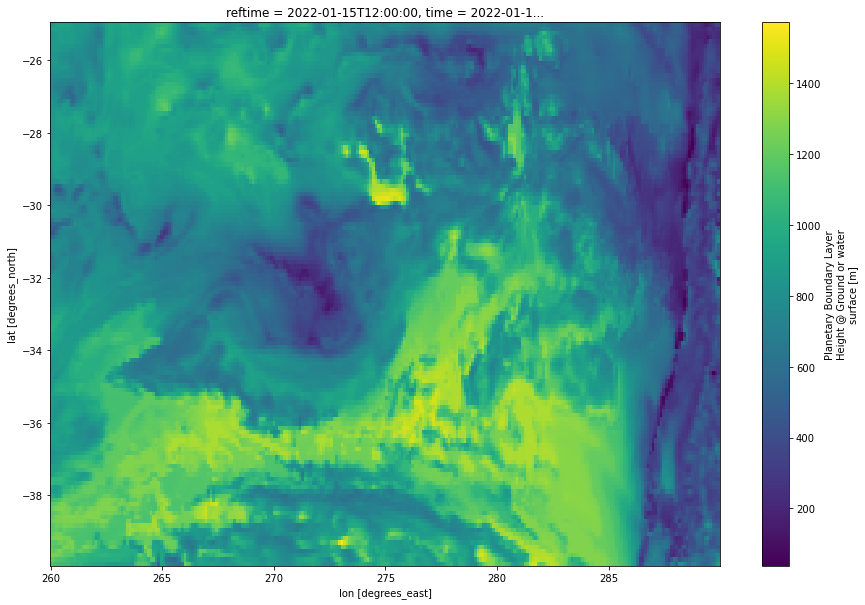

In [33]:
# plot quick
fnl1['Planetary_Boundary_Layer_Height_surface'].squeeze().plot(figsize=(15,10), facecolor='w')

---

### Ejemplo regrillado 2D

In [34]:
# cargar 2do dataset 
url2     = 'https://rda.ucar.edu/thredds/dodsC/files/g/ds083.3/2022/202201/gdas1.fnl0p25.2022011512.f00.grib2'
fnl2     = xr.open_dataset(url1)                                                                          
fnl2     = fnl2.sortby('lat').sortby('lon')      
fnl2                                                         

<xarray.Dataset>
Dimensions:                                                               (
                                                                           lat: 1536,
                                                                           lon: 3072,
                                                                           time: 1,
                                                                           height_above_ground: 1,
                                                                           depth_below_surface_layer: 4,
                                                                           depth_below_surface_layer_bounds_1: 2,
                                                                           height_above_ground1: 1,
                                                                           hybrid: 1,
                                                                           depth_below_surface_layer1: 1,
                                                                           depth_below_surface_layer1_bounds_1: 2)
Coordinates:
  * lat                                                                   (lat) float32 ...
  * lon                                                                   (lon) float32 ...
    reftime                                                               datetime64[ns] ...
  * time                                                                  (time) datetime64[ns] ...
  * height_above_ground                                                   (height_above_ground) float32 ...
  * depth_below_surface_layer                                             (depth_below_surface_layer) float32 ...
  * height_above_ground1                                                  (height_above_ground1) float32 ...
  * hybrid                                                                (hybrid) float32 ...
  * depth_below_surface_layer1                                            (depth_below_surface_layer1) float32 ...
Dimensions without coordinates: depth_below_surface_layer_bounds_1,
                                depth_below_surface_layer1_bounds_1
Data variables: (12/48)
    GaussLatLon_Projection                                                int32 ...
    depth_below_surface_layer_bounds                                      (depth_below_surface_layer, depth_below_surface_layer_bounds_1) float32 ...
    depth_below_surface_layer1_bounds                                     (depth_below_surface_layer1, depth_below_surface_layer1_bounds_1) float32 ...
    Geopotential_height_hybrid                                            (time, hybrid, lat, lon) float32 ...
    Geopotential_height_surface                                           (time, lat, lon) float32 ...
    Ice_cover_surface                                                     (time, lat, lon) float32 ...
    ...                                                                    ...
    Vegetation_surface                                                    (time, lat, lon) float32 ...
    Water_equivalent_of_accumulated_snow_depth_surface                    (time, lat, lon) float32 ...
    u-component_of_wind_height_above_ground                               (time, height_above_ground, lat, lon) float32 ...
    u-component_of_wind_hybrid                                            (time, hybrid, lat, lon) float32 ...
    v-component_of_wind_height_above_ground                               (time, height_above_ground, lat, lon) float32 ...
    v-component_of_wind_hybrid                                            (time, hybrid, lat, lon) float32 ...
Attributes:
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_proce

In [39]:
regridder = xe.Regridder(fnl2, fnl1, 'bilinear')                                    # Construir el regridder (asegurarse de que tengan los mismos nombres de coordenadas!)
fnl2_reg  = regridder(fnl2['Sensible_heat_net_flux_surface'], keep_attrs=True)      # Usar el regridder para interpolar
fnl2_reg # voilá

<xarray.DataArray 'Sensible_heat_net_flux_surface' (time: 1, lat: 128, lon: 256)>
array([[[ 14.,  14.,  13., ..., 173., 170., 168.],
        [ 17.,  17.,  16., ..., 167., 165., 160.],
        [ 18.,  17.,  17., ..., 157., 159., 152.],
        ...,
        [ 12.,  12.,  11., ..., 101.,  85.,  58.],
        [ 12.,  12.,  11., ...,  88.,  96.,  75.],
        [ 12.,  12.,  11., ...,  65.,  81.,  76.]]], dtype=float32)
Coordinates:
    reftime  datetime64[ns] 2022-01-15T12:00:00
  * time     (time) datetime64[ns] 2022-01-15T12:00:00
  * lat      (lat) float32 -39.89 -39.77 -39.66 -39.54 ... -25.25 -25.13 -25.01
  * lon      (lon) float32 260.0 260.2 260.3 260.4 ... 289.6 289.7 289.8 289.9
Attributes:
    long_name:                       Sensible heat net flux @ Ground or water...
    units:                           W.m-2
    abbreviation:                    SHTFL
    grid_mapping:                    GaussLatLon_Projection
    Grib_Variable_Id:                VAR_0-0-11_L1
    Grib2_Parameter:                 [ 0  0 11]
    Grib2_Parameter_Discipline:      Meteorological products
    Grib2_Parameter_Category:        Temperature
    Grib2_Parameter_Name:            Sensible heat net flux
    Grib2_Level_Type:                1
    Grib2_Level_Desc:                Ground or water surface
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1
    regrid_method:                   bilinear

In [ ]:
#guardar
fnl2_reg.to_netcdf('~/ejemplo.nc')

---

In [2]:
first_date = '2021-01-01'
last_date  = '2022-12-31'

lonmin,lonmax = 360-90,360-69
latmin,latmax = -40,-15

fnlgfs_dictionary = {
    'Downward_Short-Wave_Radiation_Flux_surface':'dswrfsfc',
    'Downward_Long-Wave_Radp_Flux_surface':'dlwrfsfc',
    'Upward_Long-Wave_Radp_Flux_surface':'ulwrfsfc',
    'Upward_Short-Wave_Radiation_Flux_surface':'uswrfsfc',
    'u-component_of_wind_height_above_ground':'ugrd10m',
    'v-component_of_wind_height_above_ground':'vgrd10m',
    'Precipitation_rate_surface':'pratesfc',
    'Relative_humidity_height_above_ground':'rh2m',
    'Temperature_height_above_ground':'tmp2m',
}

flux_variables = [
    'Downward_Short-Wave_Radiation_Flux_surface',
    'Downward_Long-Wave_Radp_Flux_surface',
    'Upward_Short-Wave_Radiation_Flux_surface',
    'Upward_Long-Wave_Radp_Flux_surface'
    ]
    
bulk_variables   = [
    'u-component_of_wind_height_above_ground',
    'v-component_of_wind_height_above_ground',
    'Precipitation_rate_surface',
    'Relative_humidity_height_above_ground',
    'Temperature_height_above_ground',
    ]

gfs_variables = [
    'vgrd10m',
    'ugrd10m',
    'tmp2m',
    'rh2m',
    'pratesfc',
    'dswrfsfc',
    'dlwrfsfc',
    'uswrfsfc',
    'ulwrfsfc'
]

---

### GDAS/FNL Hindcast (GFS Archive)

In [47]:
def get_GDASFNL_filename(idate, ftype):
    """
    This function builds the url for the openDAP webservice of
    the GDAS/FNL GFS archive dataset.

    Args:
        idate (str): date string as (%Y-%m-%d %H:%M:%S) format
        ftype (str): flux or bulk dataset

    Raises:
        ValueError: if ftype not flux or bulk

    Returns:
        str: opendap url
    """
    date    = pd.to_datetime(idate)
    year    = date.strftime('%Y')
    yrmonth = date.strftime('%Y%m')
    ftime   = date.strftime('%Y%m%d%H')
    if ftype == 'flux':
        url     = 'https://rda.ucar.edu/thredds/dodsC/files/g/ds084.4/'+year+'/'+yrmonth+'/gdas1.sflux.'+ftime+'.f00.grib2'
    elif ftype == 'bulk':
        url     = 'https://rda.ucar.edu/thredds/dodsC/files/g/ds083.3/'+year+'/'+yrmonth+'/gdas1.fnl0p25.'+ftime+'.f00.grib2'
    else:
        raise ValueError('ftype can only be "flux" or "bulk"')
    return url


def get_GDASFNL_bulks(idate, lonmin, lonmax, latmin, latmax, variables):
    """
    Given a date and a collection of variables this function grabs
    the GFS/FNL data from the opendap service

    Args:
        idate (_type_): _description_
        variables (_type_, optional): _description_. Defaults to bulk_variables.

    Returns:
        _type_: _description_
    """
    # NCEP GDAS/FNL 0.25 Degree Global Tropospheric Analyses and Forecast Grids
    bulkfiles = [get_GDASFNL_filename(idate+hour, 'bulk')
                 for hour in [' 00:00:00', ' 06:00:00', ' 12:00:00', ' 18:00:00']]
    bulks     = []
    for p in bulkfiles:
        data_bulk = xr.open_dataset(p)[variables]
        for height in range(4):
            try:
                data_bulk = data_bulk.isel({'height_above_ground'+str(height+1):0})
                data_bulk = data_bulk.drop('height_above_ground'+str(height+1))
            except:
                pass
            
        data_bulk = data_bulk.sortby('lat').sortby('lon').sel(
            lat=slice(latmin,latmax), lon=slice(lonmin,lonmax)).squeeze()
        data_bulk['time']    = pd.to_datetime(p.split('.')[-3], format='%Y%m%d%H')
        try:
            data_bulk = data_bulk.drop('reftime')
        except:
            pass
        try:
            data_bulk = data_bulk.drop_vars('reftime')
        except:
            pass
        bulks.append(data_bulk)
    data_bulk = xr.concat(bulks,'time')
    return data_bulk


def get_GDASFNL_flux(idate, lonmin, lonmax, latmin, latmax, variables):
    """
    Given a date and a collection of variables this function grabs
    the GFS/FNL data from the opendap service

    Args:
        idate (_type_): _description_
        variables (_type_, optional): _description_. Defaults to bulk_variables.

    Returns:
        _type_: _description_
    """
    # NCEP GDAS/FNL Global Surface Flux Grids
    fluxfiles = [get_GDASFNL_filename(idate+hour, 'flux')
                 for hour in [' 00:00:00', ' 06:00:00', ' 12:00:00', ' 18:00:00']]
    fluxes    = []
    for p in fluxfiles:
        data_flux = xr.open_dataset(p)[variables]
        data_flux = data_flux.squeeze()
        data_flux = data_flux.sortby('lat').sortby('lon').sel(lat=slice(latmin,latmax),
                                                              lon=slice(lonmin,lonmax))
        data_flux['time'] = pd.to_datetime(p.split('.')[-3], format='%Y%m%d%H')
        try:
            data_flux = data_flux.drop('reftime')
        except:
            pass
        try:
            data_flux = data_flux.drop_vars('reftime')
        except:
            pass
        fluxes.append(data_flux)
    data_flux = xr.concat(fluxes,'time')
    return data_flux


def get_GDASFNL_data(idate,
                     lonmin=lonmin, lonmax=lonmax,
                     latmin=latmin, latmax=latmax,
                     bulk_variables=bulk_variables,
                     flux_variables=flux_variables,
                     rename_dict=fnlgfs_dictionary,
                     outdir='./', save=False, mode='w'):
    """_summary_

    Args:
        idate (_type_): _description_
        bulk_variables (_type_, optional): _description_. Defaults to bulk_variables.
        flux_variables (_type_, optional): _description_. Defaults to flux_variables.
        rename_dict (_type_, optional): _description_. Defaults to fnlgfs_dictionary.
        outdir (str, optional): _description_. Defaults to './'.
        save (bool, optional): _description_. Defaults to False.
        mode (str, optional): _description_. Defaults to 'w'.

    Returns:
        _type_: _description_
    """
    fname = outdir+'/gdas1.fnl0p25.'+idate.replace('-','').replace(' ','')+'.f00.nc'
    if os.path.isfile(fname):
        return xr.open_dataset(fname)
        
    # ---------------------------------------------------------------------------- #
    # NCEP GDAS/FNL 0.25 Degree Global Tropospheric Analyses and Forecast Grids
    data_bulk = get_GDASFNL_bulks(idate,
                                  lonmin=lonmin, lonmax=lonmax,
                                  latmin=latmin, latmax=latmax,
                                  variables=bulk_variables)
    # ---------------------------------------------------------------------------- #
    # NCEP GDAS/FNL Global Surface Flux Grids
    data_flux = get_GDASFNL_flux(idate,
                                 lonmin=lonmin, lonmax=lonmax,
                                 latmin=latmin, latmax=latmax,
                                 variables=flux_variables)
    # ---------------------------------------------------------------------------- #
    # Regrid gaussian grid to regular and merge datasets
    regridder = xe.Regridder(data_flux, data_bulk, 'bilinear')
    data_flux = regridder(data_flux, keep_attrs=True)

    data = xr.merge([data_flux, data_bulk])
    data = data.rename(rename_dict)
    if save:
        data.to_netcdf(fname, mode=mode)
    return data

In [54]:
data = xr.open_dataset(get_GDASFNL_filename('2022-05-05','flux'))

---
### GFS near real time analysis

In [165]:
def get_GFS_filename(idate, ftype):
    """_summary_

    Args:
        idate (_type_): _description_
        ftype (_type_): _description_

    Raises:
        ValueError: _description_

    Returns:
        _type_: _description_
    """
    date = pd.to_datetime(idate)
    yrmonthday = date.strftime('%Y%m%d')
    hour = date.strftime('%H')
    url = "http://nomads.ncep.noaa.gov:80/dods/gfs_0p25/gfs"+yrmonthday+"/gfs_0p25_"+hour
    if ftype=='forecast':
        url = url+"z"
    elif ftype=='analysis':
        url = url+"z_anl"
    else:
        raise ValueError('ftype can only be "forecast" or "analysis"')
    return url

def get_GFS_data(idate, ftype='forecast', variables=gfs_variables,
                outdir='./', save=False, mode='w'):
    fname = outdir+'/gfs.0p25.'+idate.replace('-','').replace(' ','')+'.nc'
    if os.path.isfile(fname):
        return xr.open_dataset(fname)
    files = [get_GFS_filename(idate+hour, ftype)
            for hour in [' 00:00:00', ' 06:00:00', ' 12:00:00', ' 18:00:00']]
    gfs = []
    for p in files:
        data = xr.open_dataset(p)
        data = data[variables].sortby('time').isel(time=0)
        data = data.sortby('lat').sortby('lon').sel(lat=slice(-40,-15), lon=slice(360-90,360-69)).squeeze()
        gfs.append(data)
    gfs = xr.concat(gfs, 'time')
    if save:
        gfs.to_netcdf(fname, mode=mode)
    return gfs
        